# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [4]:
print("Необходимо фиксировать сид для воспросизводимости результатов. Так как при каждом новом запуске программы без фиксированного сида, набор случайных чисел будет разный.")

Необходимо фиксировать сид для воспросизводимости результатов. Так как при каждом новом запуске программы без фиксированного сида, набор случайных чисел будет разный.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
seed = 42
df_train_sample = df_train.sample(n=10, random_state=seed)
print(df_train_sample)

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [8]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [10]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [13]:
print("В тренировочном и тестовом датасетах есть пропуски в колонках: mileage, engine, max_power, torque, seats")

В тренировочном и тестовом датасетах есть пропуски в колонках: mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [5]:
features_only = df_train.drop('selling_price', axis=1)
duplicates = features_only.duplicated()
print("Количество дубликатов:", duplicates.sum())

Количество дубликатов: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [6]:
duplicates_mask = features_only.duplicated(keep=False)
duplicated_rows = df_train[duplicates_mask]

print("Объекты с одинаковым признаковым описанием (исключая целевую переменную):")
print(duplicated_rows)

Объекты с одинаковым признаковым описанием (исключая целевую переменную):
                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileag

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [7]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [8]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [9]:
df_train = df_train.reset_index(drop = True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [10]:
df_train['mileage'] = df_train['mileage'].str.extract('(\d+(\.\d+)?)', expand=False)[0].astype(float)
df_test['mileage'] = df_test['mileage'].str.extract('(\d+(\.\d+)?)', expand=False)[0].astype(float)
df_train['engine'] = df_train['engine'].str.extract('(\d+(\.\d+)?)', expand=False)[0].astype(float)
df_test['engine'] = df_test['engine'].str.extract('(\d+(\.\d+)?)', expand=False)[0].astype(float)
df_train['max_power'] = df_train['max_power'].str.extract('(\d+(\.\d+)?)', expand=False)[0].astype(float)
df_test['max_power'] = df_test['max_power'].str.extract('(\d+(\.\d+)?)', expand=False)[0].astype(float)

In [11]:
def extract_torque_values(torque_str):
    if pd.isna(torque_str):
        return pd.NA, pd.NA

    match = re.search(r'(\d+\.?\d*)\s*(Nm|kgm)?\s*(?:@|at)?\s*([\d,]+\.?\d*)?\s*-?\s*([\d,]+)?\s*(rpm)?', torque_str, re.IGNORECASE)
    if match:
        torque_value = match.group(1)
        torque_unit = match.group(2)
        rpm_value_start = match.group(3)
        rpm_value_end = match.group(4)

        if torque_unit and torque_unit.lower() == 'kgm':
            torque_value = float(torque_value) * 9.81
        else:
            torque_value = float(torque_value)

        if rpm_value_start and rpm_value_end:
            rpm_value_start = float(rpm_value_start.replace(',', ''))
            rpm_value_end = float(rpm_value_end.replace(',', ''))
            rpm_value = (rpm_value_start + rpm_value_end) / 2
        elif rpm_value_start:
            rpm_value = float(rpm_value_start.replace(',', ''))
        else:
            rpm_value = pd.NA

        return torque_value, rpm_value
    else:
        return pd.NA, pd.NA

df_train[['torque_value', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: pd.Series(extract_torque_values(x)))

df_train['torque_value'] = pd.to_numeric(df_train['torque_value'], errors='coerce')
df_train['max_torque_rpm'] = pd.to_numeric(df_train['max_torque_rpm'], errors='coerce')

df_test[['torque_value', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: pd.Series(extract_torque_values(x)))

df_test['torque_value'] = pd.to_numeric(df_test['torque_value'], errors='coerce')
df_test['max_torque_rpm'] = pd.to_numeric(df_test['max_torque_rpm'], errors='coerce')

In [12]:
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [13]:
median_values = df_train.median()
df_train = df_train.fillna(median_values)
df_test = df_test.fillna(median_values)

remaining_nulls = df_test.isnull().sum()

remaining_nulls

/var/folders/bb/6mlfzyx15rn0wn_zc8jyp7v80000gn/T/ipykernel_29675/3748220755.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df_train.median()


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_value      0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [25]:
print("Количество сидений в автомобилях обычно ограничено несколькими стандартными вариантами (например, 2, 4, 5, 7, 8 мест). Это делает его подходящим для категоризации, так как каждое уникальное значение представляет отдельную группу или категорию.")

Количество сидений в автомобилях обычно ограничено несколькими стандартными вариантами (например, 2, 4, 5, 7, 8 мест). Это делает его подходящим для категоризации, так как каждое уникальное значение представляет отдельную группу или категорию.


In [14]:
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')
df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  seats           5840 non-null   int64  
 12  torque_value    5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

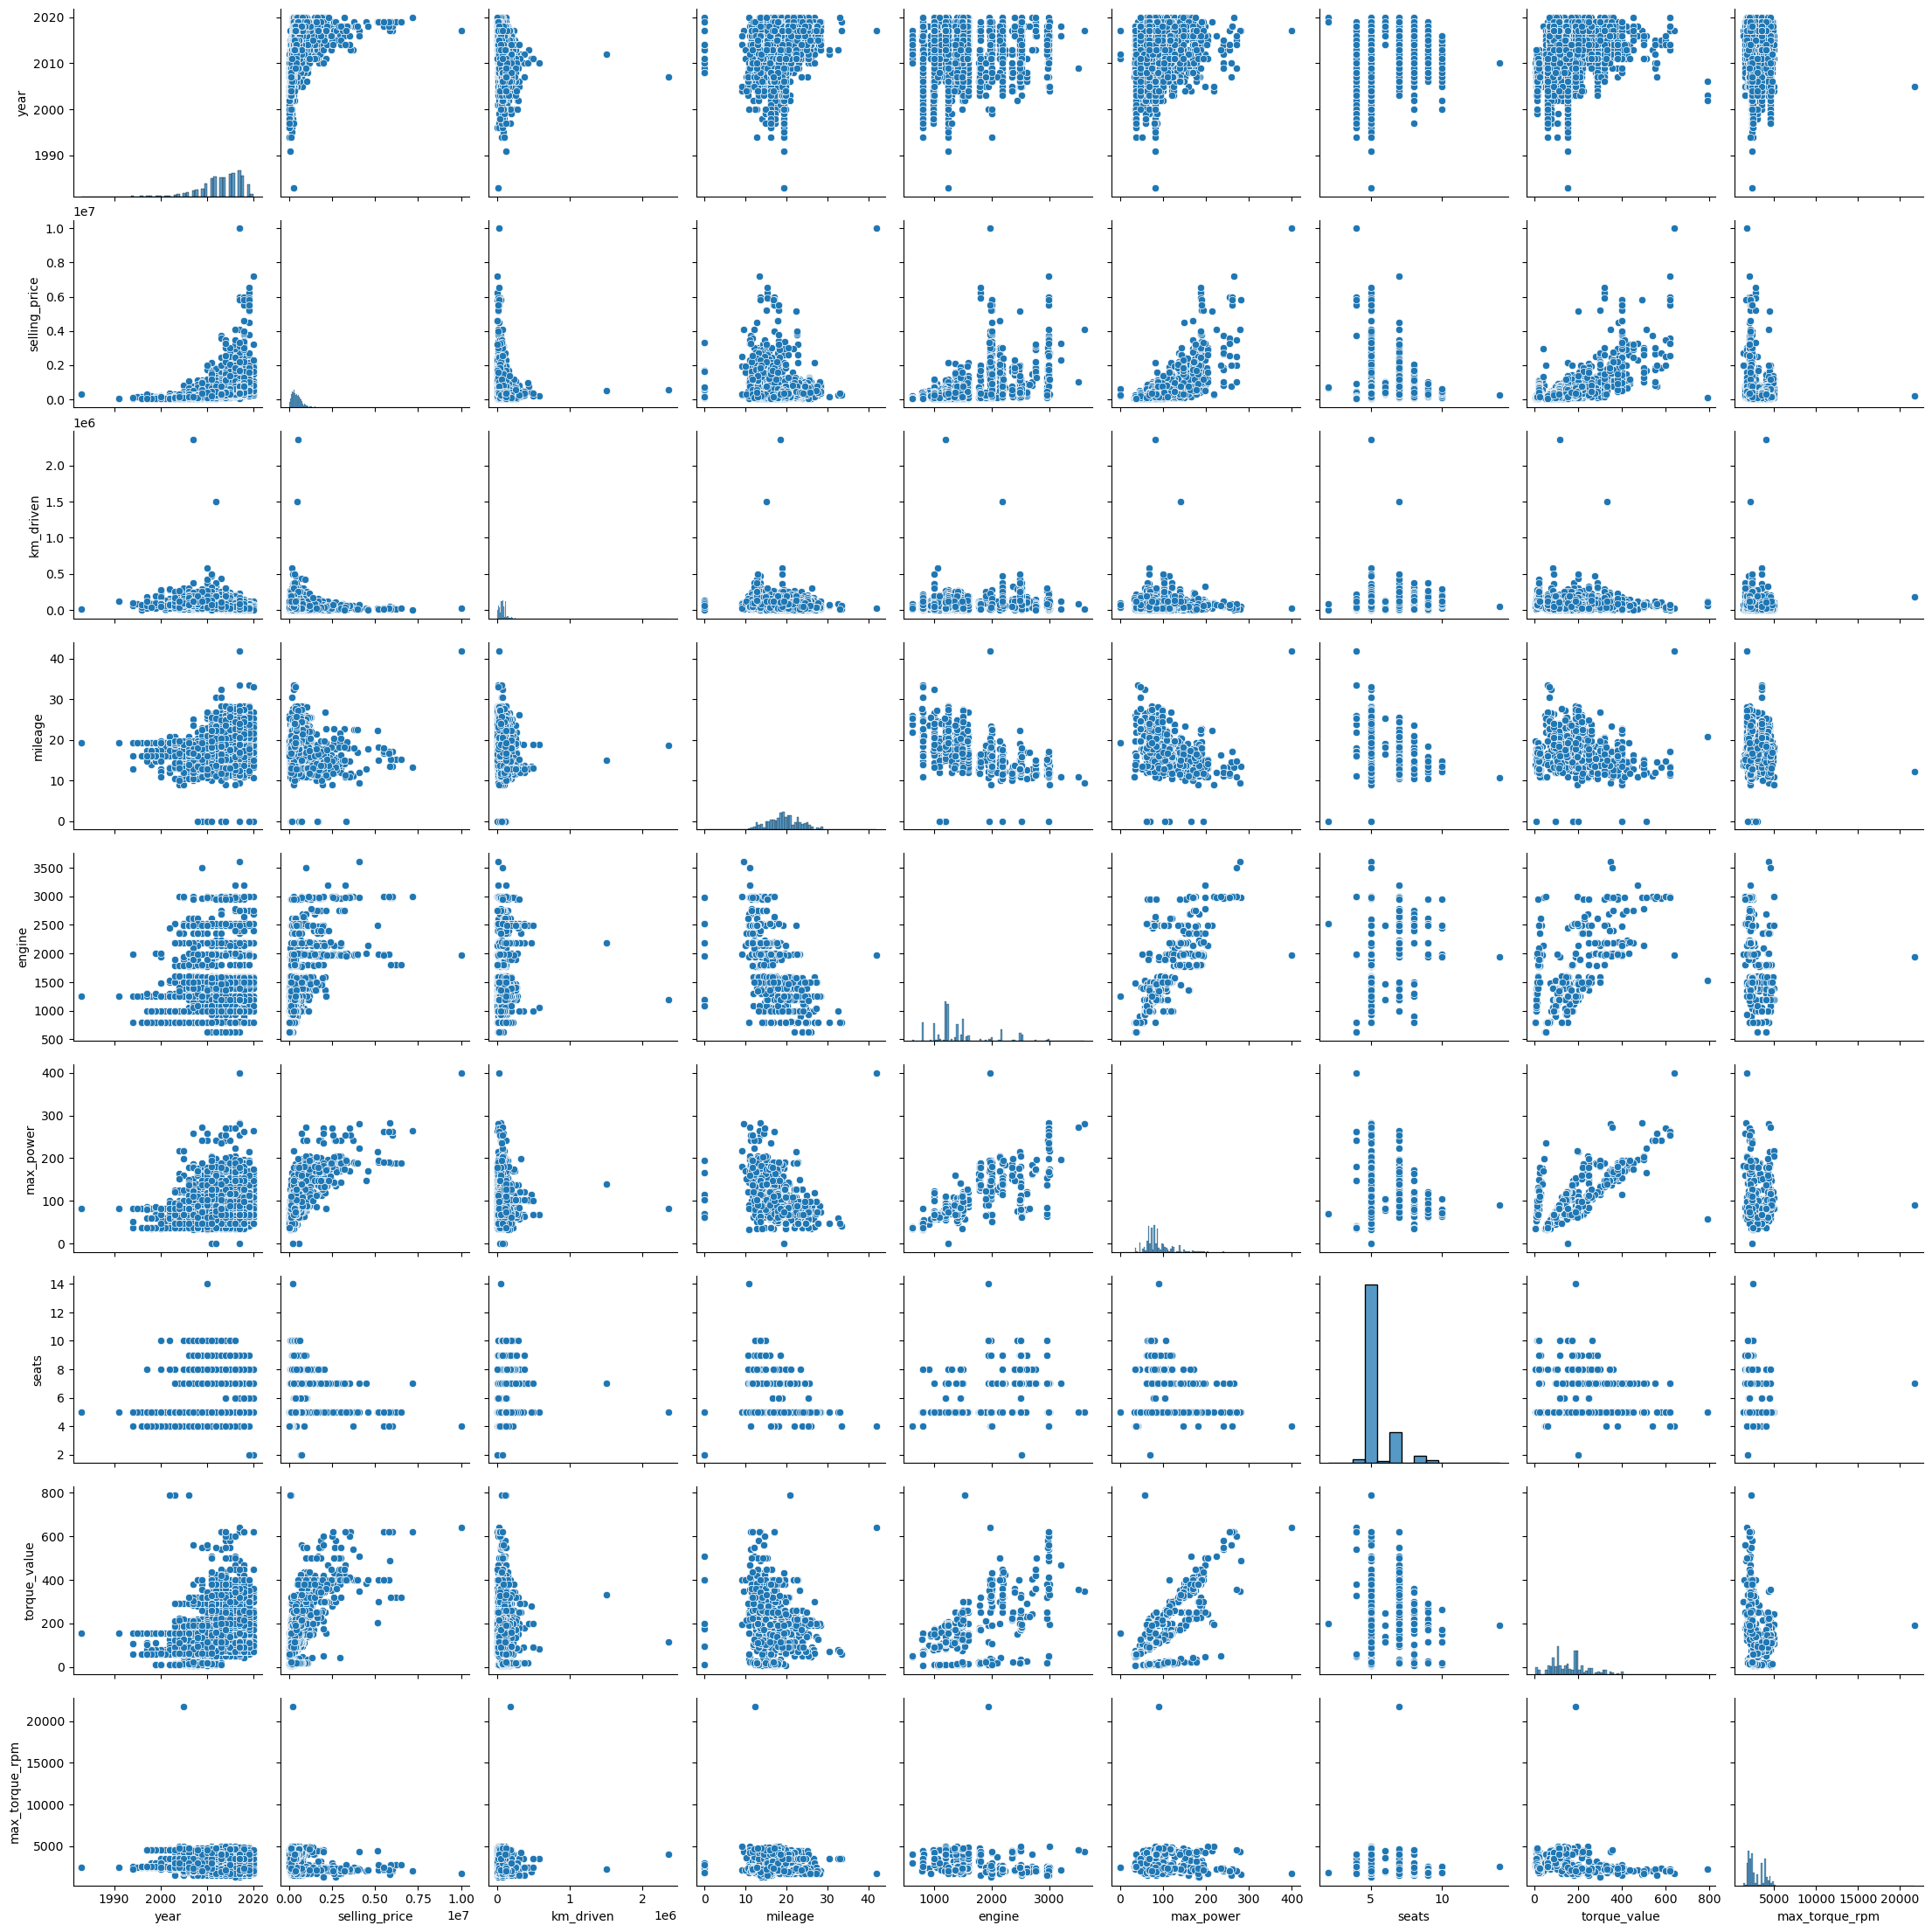

In [182]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [184]:
print('Из графиков можно сделать промежуточные выводы о том, что целевая переменная однозначно сильно зависит от года выпуска машины, расстояния, пройденного на ней, и максимальной мощности двигателя')

Из графиков можно сделать промежуточные выводы о том, что целевая переменная однозначно сильно зависит от года выпуска машины, расстояния, пройденного на ней, и мощности двигателя


In [185]:
print('Плотно коррелируют количество оборотов с максимальной мощностью двигателя')

Плотно коррелируют количество оборотов с максимальной мощностью двигателя


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

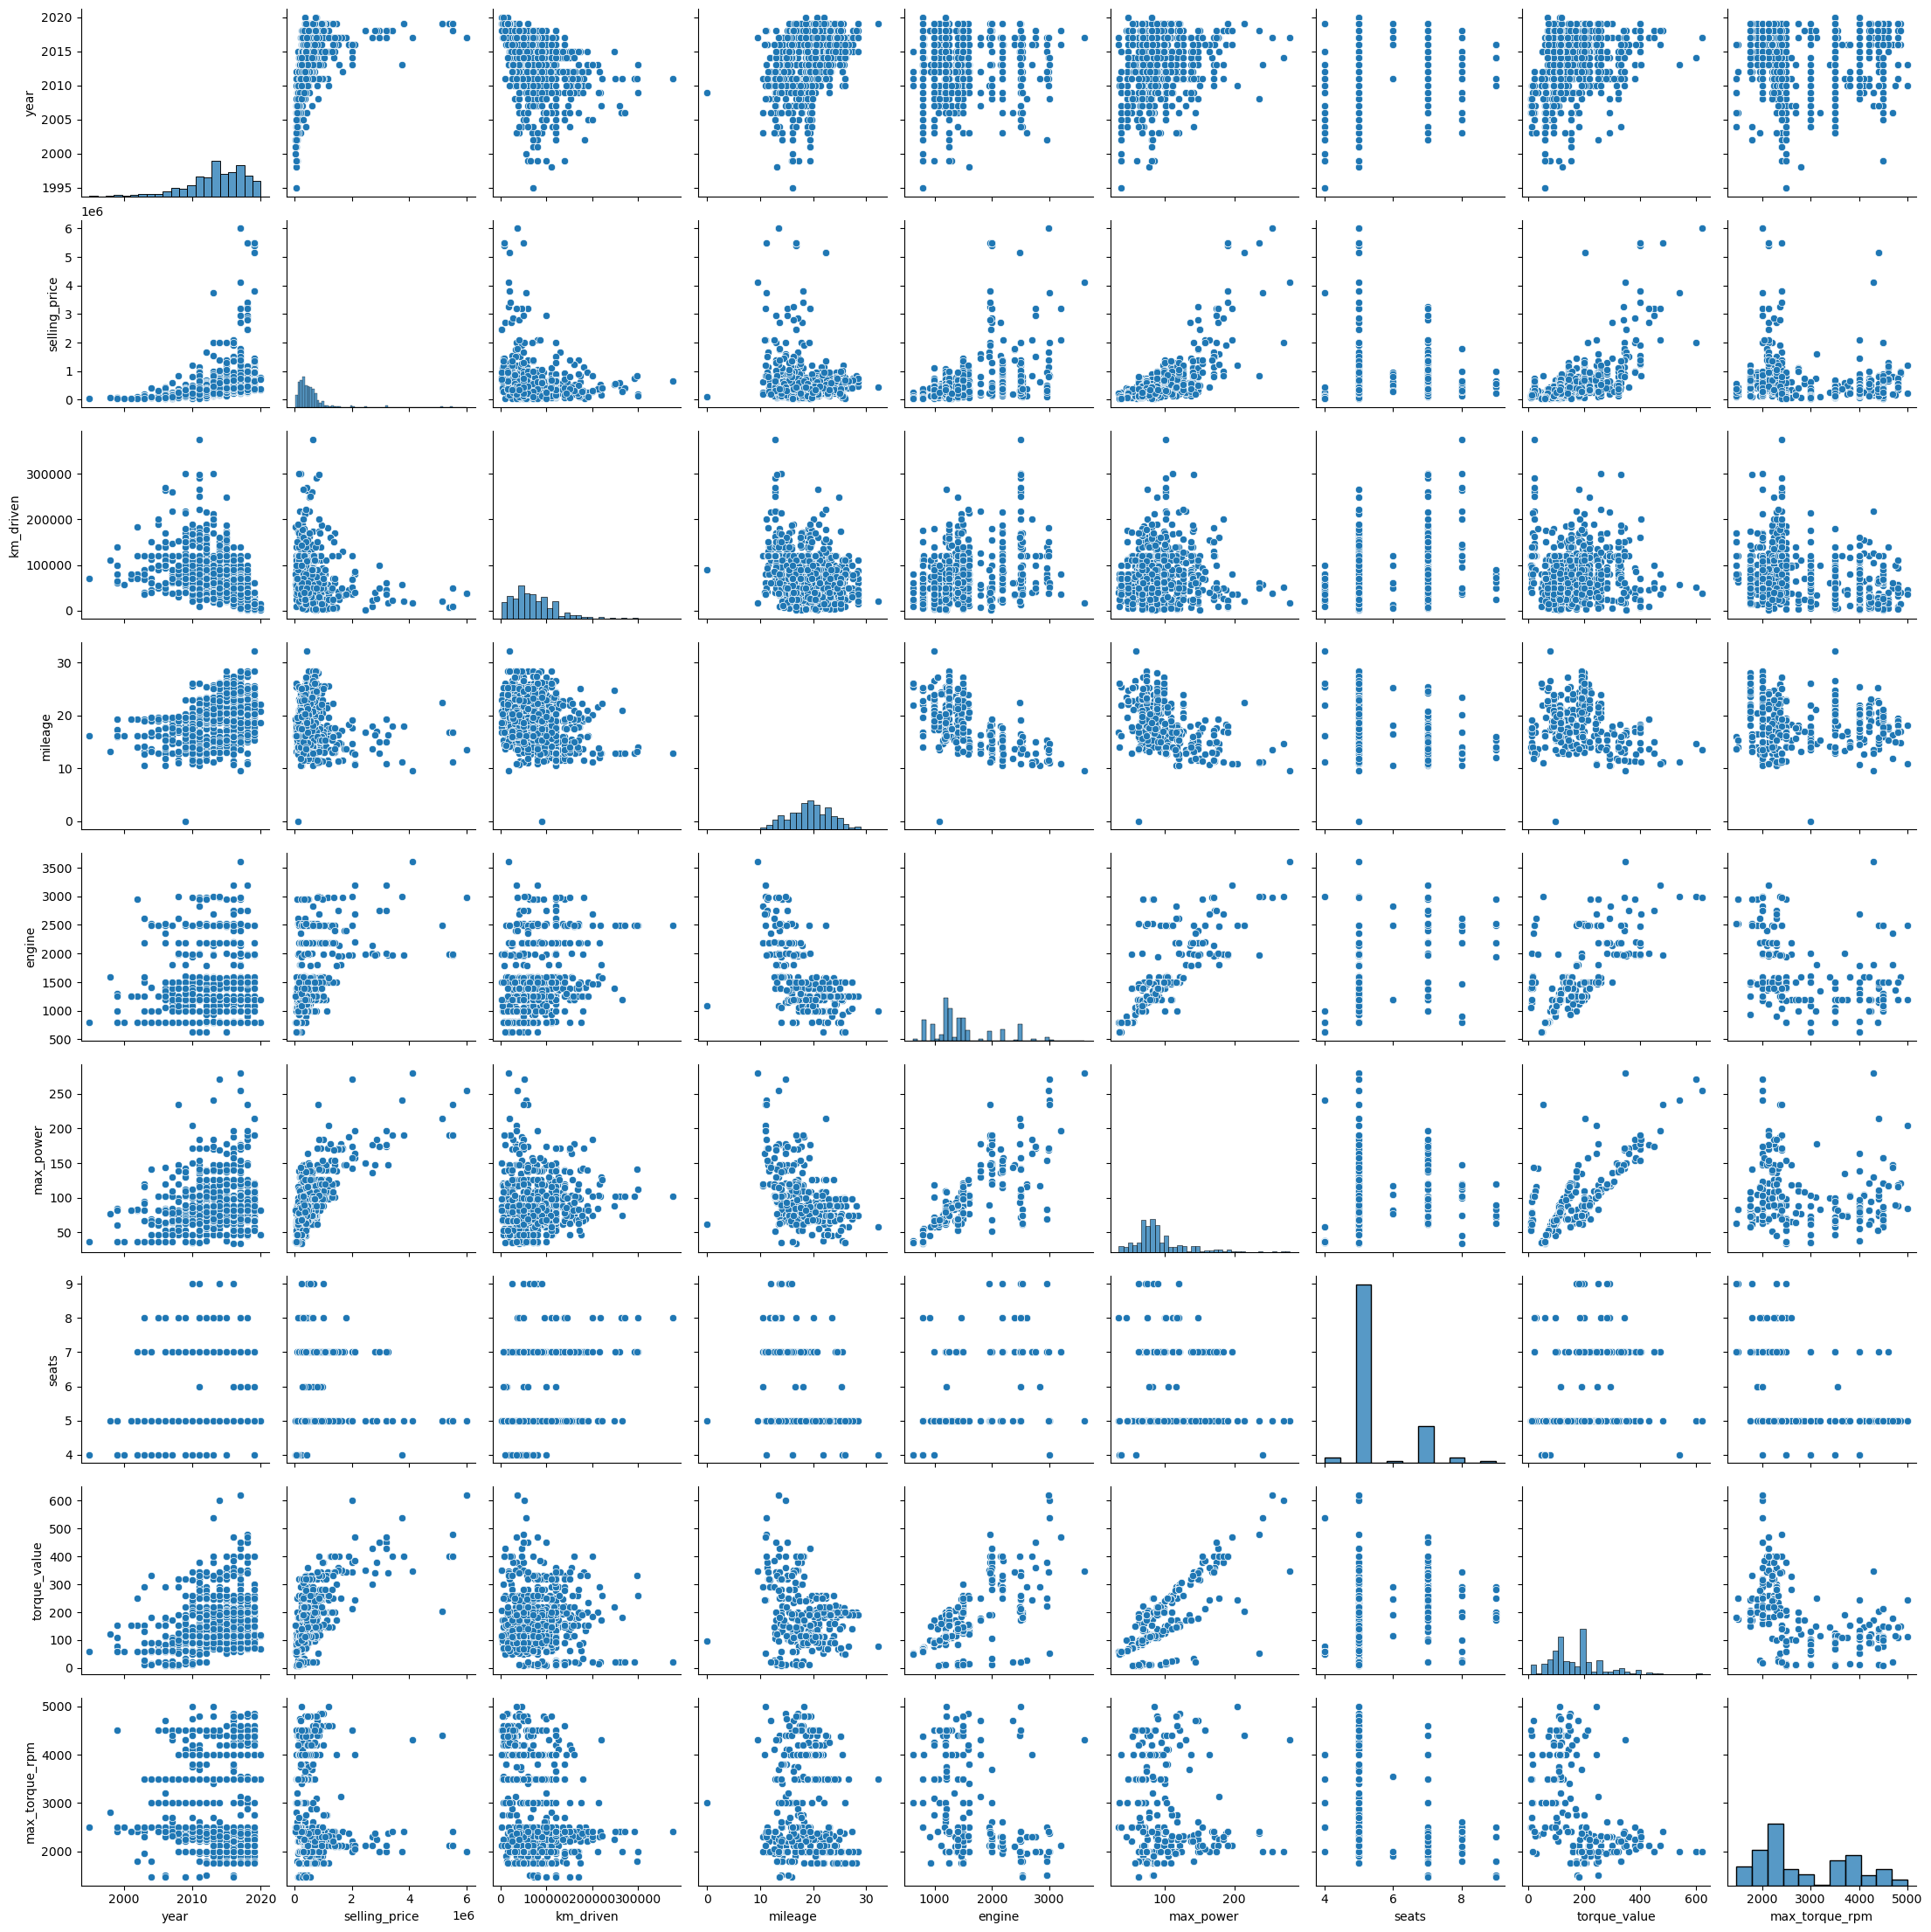

In [183]:
sns.pairplot(df_test)

In [ ]:
print('Cовокупности при разделении на трейн и тест оказались похожими')

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

/var/folders/bb/6mlfzyx15rn0wn_zc8jyp7v80000gn/T/ipykernel_88059/820319921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


<Axes: >

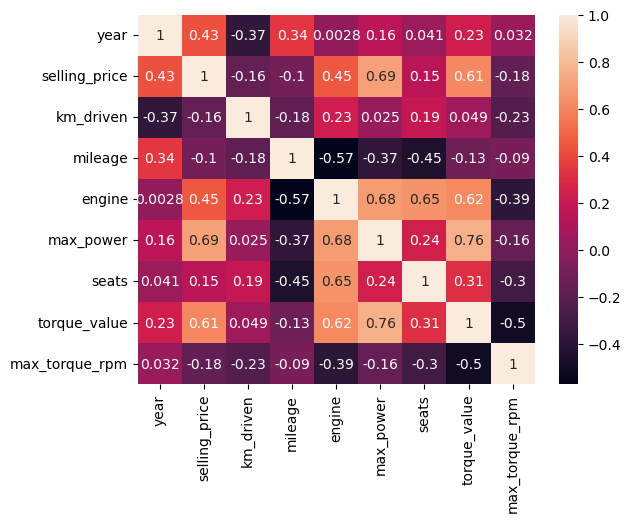

In [187]:
sns.heatmap(df_train.corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [1]:
print('Наименее скоррелированы между собой признаки литража и максимальное количество оборотов двигателя, а также год и максимальное количество оборотов двигателя')

Наименее скоррелированы между собой признаки года и максимальное количество оборотов двигателя, а также год и мощность двигателя


In [189]:
print('Наиболее сильная положительная линейная зависимость наблюдается между ценой и максимальной мощностью двигателя, максимальной мощностью двигателя и количеством оборотов двигателя')

Наиболее сильная положительная линейная зависимость наблюдается между ценой и годом выпуска машины, ценой и максимальной мощностью двигателя, ценой и количеством оборотов двигателя


In [190]:
print('Правильно. Так как показатель года имеет сильную (пусть и отрицательную) линейную зависимость от пробега')

Правильно. Так как показатель года имеет сильную (пусть и отрицательную) линейную зависимость от пробега


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

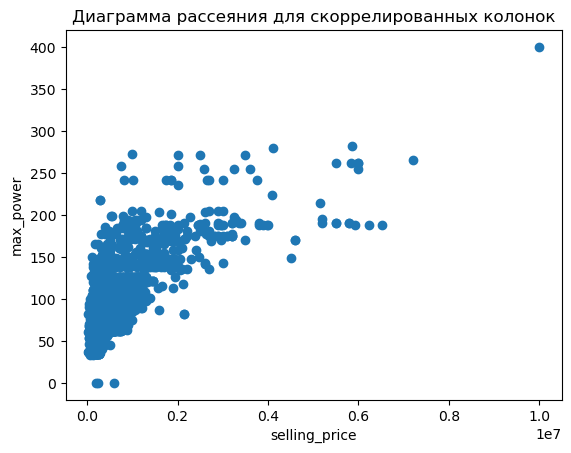

In [27]:
plt.scatter(df_train['selling_price'], df_train['max_power'])

plt.xlabel('selling_price')
plt.ylabel('max_power')
plt.title('Диаграмма рассеяния для скоррелированных колонок')

plt.show()

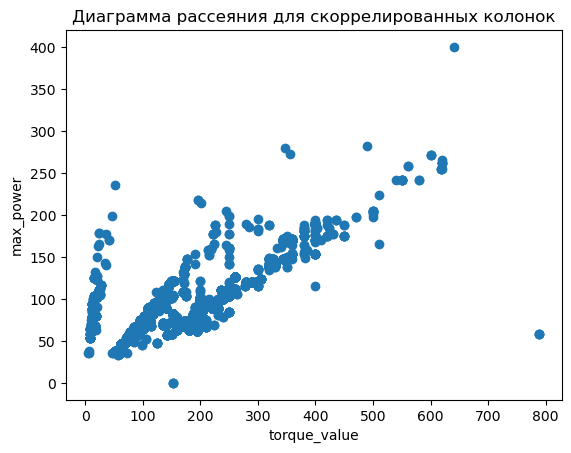

In [28]:
plt.scatter(df_train['torque_value'], df_train['max_power'])

plt.xlabel('torque_value')
plt.ylabel('max_power')
plt.title('Диаграмма рассеяния для скоррелированных колонок')

plt.show()

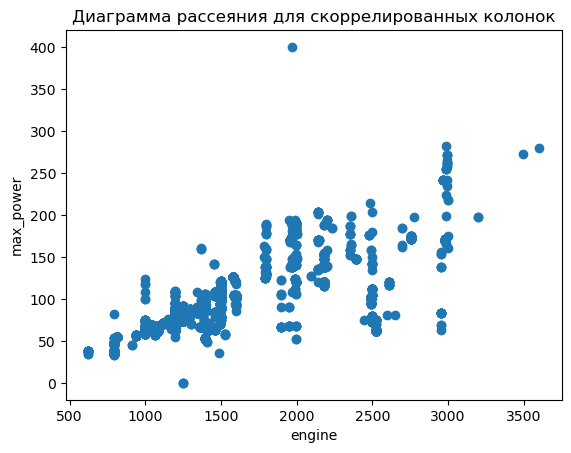

In [32]:
plt.scatter(df_train['engine'], df_train['max_power'])

plt.xlabel('engine')
plt.ylabel('max_power')
plt.title('Диаграмма рассеяния для скоррелированных колонок')

plt.show()

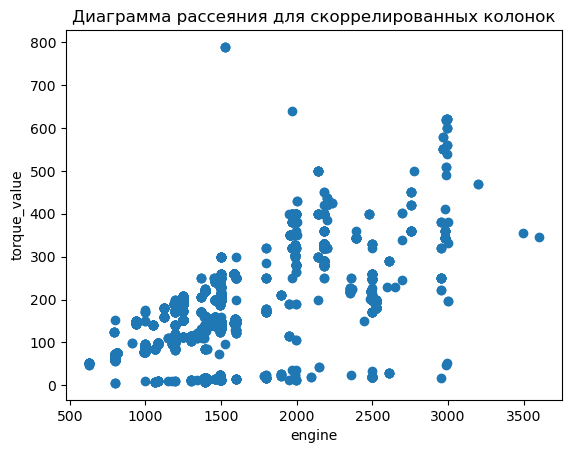

In [33]:
plt.scatter(df_train['engine'], df_train['torque_value'])

plt.xlabel('engine')
plt.ylabel('torque_value')
plt.title('Диаграмма рассеяния для скоррелированных колонок')

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

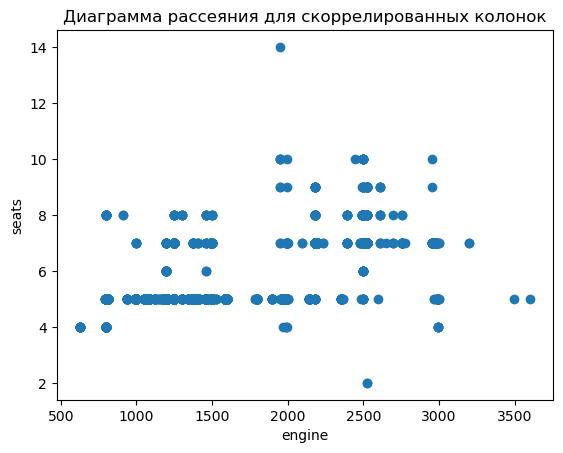

In [34]:
plt.scatter(df_train['engine'], df_train['seats'])

plt.xlabel('engine')
plt.ylabel('seats')
plt.title('Диаграмма рассеяния для скоррелированных колонок')

plt.show()

In [36]:
print('График может показаться непрезентабельным, и показать, что количество мест в автомобиле не должно сильно отражаться на каких-либо признаках. Однако, потом пришло осознание, что чем больше количество мест в автомобиле, тем он тяжелее и тем больший объем двигателя автомобилю необходим ')

График может показаться непрезентабельным, и показать, что количество мест в автомобиле не должно сильно отражаться на каких-либо признаках. Однако, потом пришло осознание, что чем больше количество мест в автомобиле, тем он тяжелее и тем больший объем двигателя автомобилю необходим 


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [14]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.000,2000.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.744,2250.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,11.500,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,113.750,4000.0


In [15]:
categorical_columns_to_drop = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']

y_train = df_train['selling_price']
X_train = df_train.drop(categorical_columns_to_drop, axis = 1)

In [16]:
assert X_train.shape == (5840, 8) #изменил на 8, так как столбец torque не дропнул, а преобразовал в 2 новых
#Но если честно, столбец year я бы тоже отнес к категориальным признакам

In [17]:
y_test = df_test['selling_price']
X_test = df_test.drop(categorical_columns_to_drop, axis = 1)

In [18]:
assert X_test.shape == (1000, 8) #изменил на 8, так как столбец torque не дропнул, а преобразовал в 2 новых

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"R^2 на тренировочных данных: {r2_train}")
print(f"R^2 на тестовых данных: {r2_test}")
print(f"MSE на тренировочных данных: {mse_train}")
print(f"MSE на тестовых данных: {mse_test}")

R^2 на тренировочных данных: 0.6021086867038812
R^2 на тестовых данных: 0.5998150146143241
MSE на тренировочных данных: 114050904890.23677
MSE на тестовых данных: 230037757137.44006


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_train_pred = model_scaled.predict(X_train_scaled)
y_test_pred = model_scaled.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"R^2 на тренировочных данных: {r2_train}")
print(f"R^2 на тестовых данных: {r2_test}")
print(f"MSE на тренировочных данных: {mse_train}")
print(f"MSE на тестовых данных: {mse_test}")

R^2 на тренировочных данных: 0.6021086867038836
R^2 на тестовых данных: 0.5998150146143255
MSE на тренировочных данных: 114050904890.23607
MSE на тестовых данных: 230037757137.43918


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [21]:
coefficients = model.coef_
feature_names = X_train.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

most_informative_feature = coefficients_df.iloc[0]['Feature']

print(f"Наиболее информативный признак: {most_informative_feature}")

Наиболее информативный признак: year


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [22]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 10)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 230044784114.62076
R-squared: 0.5998027901395451


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [23]:
model.coef_

array([ 3.95502179e+04, -8.19931614e-01, -2.90420125e+03,  3.53005429e+01,
        9.67906374e+03, -3.39790995e+04,  3.60086311e+02, -5.32465655e+01])

In [24]:
lasso_model.coef_

array([161947.87875884, -49241.25164044, -11541.2921861 ,  17134.25184854,
       306228.73187591, -33341.06879133,  32289.53224459, -51814.53036514])

In [58]:
print('Не занулила. Есть две версии относительно этого: все признаки являются значимыми для целевой переменной; дефолтное значение гиперпараметра для регуляризации слишком мало, чтобы L1 была склонна к занулению параметров ')

Не занулила. Есть две версии относительно этого: все признаки являются значимыми для целевой переменной; дефолтное значение гиперпараметра для регуляризации слишком мало, чтобы L1 была склонна к занулению параметров 


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [25]:
from sklearn.model_selection import GridSearchCV
import time

lasso = Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)

start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

execution_time = end_time - start_time

best_alpha = grid_search.best_params_['alpha']

print(f"Лучший параметр alpha: {best_alpha}")

Лучший параметр alpha: 10.0


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [26]:
print(f"Время: {execution_time}")

Время: 0.27069902420043945


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [27]:
print(f"Лучший параметр alpha: {best_alpha}")
grid_search.best_estimator_.coef_

Лучший параметр alpha: 10.0


array([161947.87875884, -49241.25164044, -11541.2921861 ,  17134.25184854,
       306228.73187591, -33341.06879133,  32289.53224459, -51814.53036514])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [28]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_elastic_net_model = grid_search.best_estimator_

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [29]:
print(f"Лучший коэффициент регуляризации alpha: {best_params['alpha']}")
print(f"Лучший коэффициент смешивания l1_ratio: {best_params['l1_ratio']}")

Лучший коэффициент регуляризации alpha: 1.0
Лучший коэффициент смешивания l1_ratio: 0.9


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [30]:
X_train_cat = df_train.drop(['name','selling_price'], axis = 1)

In [31]:
assert X_train_cat.shape == (5840, 12)

In [32]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoded_features = encoder.fit_transform(X_train_cat[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X_train_cat.drop(categorical_features, axis=1, inplace=True)

encoded_df = pd.concat([X_train_cat, encoded_df], axis=1)

encoded_df

/Users/alexeysimonenkov/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,year,km_driven,mileage,engine,max_power,torque_value,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.000,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.000,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.744,2250.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,11.500,4500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,113.750,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100,3000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,90.000,3500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,113.700,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,24.000,2325.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

ridge = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring=make_scorer(r2_score))
grid_search.fit(encoded_df, y_train)

best_alpha = grid_search.best_params_['alpha']

best_ridge_model = grid_search.best_estimator_

print(f"Лучший коэффициент регуляризации alpha: {best_alpha}")
print(f"Лучшее значение R^2: {grid_search.best_score_}")

Лучший коэффициент регуляризации alpha: 10.0
Лучшее значение R^2: 0.630028442706052


/Users/alexeysimonenkov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.03922e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [91]:
print('Качество предсказаний удалось улучшить')

Качество предсказаний удалось улучшить


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [35]:
X_test_cat = df_test.drop(['name','selling_price'], axis = 1)

encoder = OneHotEncoder(sparse=False, drop='first')

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoded_features = encoder.fit_transform(X_test_cat[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X_test_cat.drop(categorical_features, axis=1, inplace=True)
encoded_df_test = pd.concat([X_test_cat, encoded_df], axis=1)

ridge = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring=make_scorer(r2_score))
grid_search.fit(encoded_df_test, y_test)

best_alpha = grid_search.best_params_['alpha']

best_ridge_model = grid_search.best_estimator_

/Users/alexeysimonenkov/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
def business_metrics(y_true, y_pred):
    threshold = 0.1 * y_true
    
    absolute_deviation = abs(y_true - y_pred)
    
    within_threshold = absolute_deviation <= threshold
    
    accuracy = within_threshold.mean()
    
    return accuracy

y_pred = best_ridge_model.predict(encoded_df_test)

accuracy = business_metrics(y_test, y_pred)
accuracy

0.188

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [40]:
from joblib import dump
dump(model_scaled, 'cars_prediction_model.joblib')

['cars_prediction_model.joblib']

In [41]:
import pickle

# Сохранение модели, скейлера и любых других необходимых компонентов
with open('cars_prediction_model.pkl', 'wb') as file:
    pickle.dump({'model': model_scaled, 'scaler': scaler}, file)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link